In [1]:
# Se nao tiver instalado, remove o # pare installar
# pip install pandas
# pip install numpy
# pip install scikit-learn
# pip install matplotlib

In [2]:
# importar packages
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [3]:
# Direcionar para folder com todos csv. (cada csv tem meio ano(o quanto o site deixa). B de beggining, E de end)

path = "Dollar to Real - 2020 to Today"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Nao incluir files escondidos

# Criar um csv com todos 10
all_rates = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file,  sep=';', header=None)
    all_rates = pd.concat([all_rates , current_data])
    print(f'{file} addicionado')
    
all_rates.to_csv('all_rates.csv', index=False)

print('\ncsv created')

B2020.csv addicionado
B2021.csv addicionado
B2022.csv addicionado
B2023.csv addicionado
B2024.csv addicionado
E2020.csv addicionado
E2021.csv addicionado
E2022.csv addicionado
E2023.csv addicionado
E2024.csv addicionado

csv created


In [4]:
#vizualizar csv
all_rates

,0,1,2,3,4,5,6,7
0,2012020,220,A,USD,"4,0207","4,0213","1,0000","1,0000"
1,3012020,220,A,USD,"4,0516","4,0522","1,0000","1,0000"
2,6012020,220,A,USD,"4,0548","4,0554","1,0000","1,0000"
3,7012020,220,A,USD,"4,0835","4,0841","1,0000","1,0000"
4,8012020,220,A,USD,"4,0666","4,0672","1,0000","1,0000"
...,...,...,...,...,...,...,...,...
35,19082024,220,A,USD,"5,4231","5,4237","1,0000","1,0000"
36,20082024,220,A,USD,"5,4541","5,4547","1,0000","1,0000"
37,21082024,220,A,USD,"5,4701","5,4707","1,0000","1,0000"
38,22082024,220,A,USD,"5,5518","5,5524","1,0000","1,0000"


In [5]:
# Ver quantidades de rows
all_rates.shape

(1170, 8)

In [6]:
# Confirmando se a data parece estar certa:

# total dias = |4 anos(2020 ate 2023) x 365 dias| + |9 meses(2024 - estamos em final de aug) x 30 dias|
total_days = 365 * 4 + 9 * 30.5 
# Tirando final de semana
remove_weekends = total_days / 7 * 5
# Tirando feriados aproximadamente
remove_holidays = remove_weekends - 14 * 4.5
print(f"{remove_holidays:.2f} vs. {all_rates.shape}")
print("\nTotal aproximado a quantidade de rows")

1175.93 vs. (1170, 8)

Total aproximado a quantidade de rows


In [7]:
# criar df, para nao mexer na original
df = all_rates

In [8]:
# Achar as colunas que tem um unico valor para remover.(nao sao relevantes no momento)
unique = df.nunique()
unique_list = unique[unique == 1].index.tolist()
unique_list

[1, 2, 3, 6, 7]

In [9]:
# Remover as colunas acima
df = all_rates.drop(all_rates.columns[unique_list], axis=1)
df

,0,4,5
0,2012020,"4,0207","4,0213"
1,3012020,"4,0516","4,0522"
2,6012020,"4,0548","4,0554"
3,7012020,"4,0835","4,0841"
4,8012020,"4,0666","4,0672"
...,...,...,...
35,19082024,"5,4231","5,4237"
36,20082024,"5,4541","5,4547"
37,21082024,"5,4701","5,4707"
38,22082024,"5,5518","5,5524"


In [10]:
# rename colunas
df = df.rename(columns={0:"Date", 4:"Buy", 5:"Sell"})
df

,Date,Buy,Sell
0,2012020,"4,0207","4,0213"
1,3012020,"4,0516","4,0522"
2,6012020,"4,0548","4,0554"
3,7012020,"4,0835","4,0841"
4,8012020,"4,0666","4,0672"
...,...,...,...
35,19082024,"5,4231","5,4237"
36,20082024,"5,4541","5,4547"
37,21082024,"5,4701","5,4707"
38,22082024,"5,5518","5,5524"


In [11]:
# replace virgula para ponto, para nao criar problemas no futuro
df['Buy'] = df['Buy'].astype(str).str.replace(',', '.')
df['Sell'] = df['Sell'].astype(str).str.replace(',', '.')

# float
df['Buy'] = df['Buy'].astype(float)
df['Sell'] = df['Sell'].astype(float)

df

,Date,Buy,Sell
0,2012020,4.0207,4.0213
1,3012020,4.0516,4.0522
2,6012020,4.0548,4.0554
3,7012020,4.0835,4.0841
4,8012020,4.0666,4.0672
...,...,...,...
35,19082024,5.4231,5.4237
36,20082024,5.4541,5.4547
37,21082024,5.4701,5.4707
38,22082024,5.5518,5.5524


In [12]:
# Checkar que nao ha valores 'null' ou 'NaN'
null = df.isnull().sum()
nan = df.isna().sum()

print('null:\n')
print(null)
print('\nNaN:\n')
print(nan)


# Nada para limpar

null:

Date    0
Buy     0
Sell    0
dtype: int64

NaN:

Date    0
Buy     0
Sell    0
dtype: int64


In [13]:
# Arrumar e adicionar colunas:
df['Date'] = df['Date'].astype(str)
df['Date'] = df['Date'].str.zfill(8)

# Slice por dia, mes e ano
df['Day'] = df['Date'].str[:2]
df['Month'] = df['Date'].str[2:4]
df['Year'] = df['Date'].str[4:]

# Criar Date no formato correto e mes+ano
df['Date'] = df['Day'] + '/' + df['Month'] + '/' + df['Year']
df['Month&Year'] = df['Month'] + '/' + df['Year']
df['Month&Year'] = pd.to_datetime(df['Month&Year'], format='%m/%Y')


# Calcular o average entre 'Buy' e 'Sell'
df['Average'] = (df['Buy'] + df['Sell']) / 2

# ordenar as colunas
df = df[['Date', 'Month&Year', 'Day', 'Month', 'Year', 'Buy', 'Sell', 'Average']]
df

,Date,Month&Year,Day,Month,Year,Buy,Sell,Average
0,02/01/2020,2020-01-01,02,01,2020,4.0207,4.0213,4.0210
1,03/01/2020,2020-01-01,03,01,2020,4.0516,4.0522,4.0519
2,06/01/2020,2020-01-01,06,01,2020,4.0548,4.0554,4.0551
3,07/01/2020,2020-01-01,07,01,2020,4.0835,4.0841,4.0838
4,08/01/2020,2020-01-01,08,01,2020,4.0666,4.0672,4.0669
...,...,...,...,...,...,...,...,...
35,19/08/2024,2024-08-01,19,08,2024,5.4231,5.4237,5.4234
36,20/08/2024,2024-08-01,20,08,2024,5.4541,5.4547,5.4544
37,21/08/2024,2024-08-01,21,08,2024,5.4701,5.4707,5.4704
38,22/08/2024,2024-08-01,22,08,2024,5.5518,5.5524,5.5521


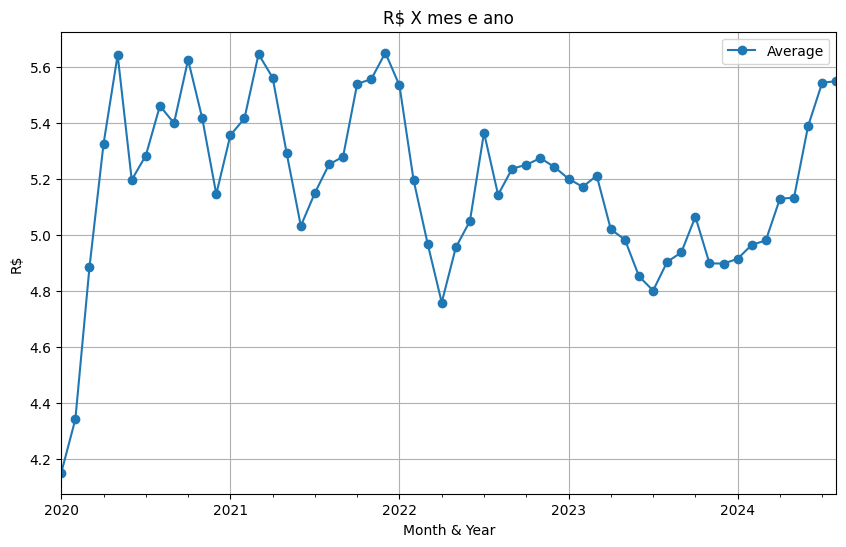

In [14]:
# mean de average em mes
mean_avg_mes= df.groupby('Month&Year')['Average'].mean()

# Criar plot de R$ X mes e ano
plt.figure(figsize=(10, 6))
mean_avg_mes.plot(kind='line', marker='o')
plt.title('R$ X mes e ano')
plt.xlabel('Month & Year')
plt.ylabel('R$')
plt.grid(True)
plt.legend()
plt.show()

### Qual foram os top 10 dias, que o valor do dollar estava alto?

In [15]:
alto = df[['Date', 'Average']].sort_values(by='Average', ascending=False)
alto.head(10)

,Date,Average
90,14/05/2020,5.9369
89,13/05/2020,5.9019
44,09/03/2021,5.8394
85,07/05/2020,5.8362
91,15/05/2020,5.8226
87,11/05/2020,5.7951
58,29/03/2021,5.7922
84,29/10/2020,5.7800
88,12/05/2020,5.7720
85,30/10/2020,5.7715


In [16]:
Baixo = df[['Date', 'Average']].sort_values(by='Average', ascending=True)
Baixo.head(10)

,Date,Average
0,02/01/2020,4.0210
1,03/01/2020,4.0519
2,06/01/2020,4.0551
4,08/01/2020,4.0669
5,09/01/2020,4.0741
6,10/01/2020,4.0742
3,07/01/2020,4.0838
7,13/01/2020,4.1306
8,14/01/2020,4.1440
9,15/01/2020,4.1619


## Machine Learning

In [17]:
# Dividir em train and test pelo ano 2023
train = df[df["Year"].astype(int) < 2023].copy()
test = df[df["Year"].astype(int) >= 2023].copy()

In [18]:
# Quantos rows tem em cada parte
print("train: " + str(train.shape))
print("test: " + str(test.shape))

train: (756, 8)
test: (414, 8)


In [19]:
# Colunas para considerar quando fazendo o prediction
predictors = ["Buy", "Sell"]

In [20]:
# Criar model e trainar ele
reg = LinearRegression()
reg.fit(train[predictors], train["Average"])

LinearRegression()

In [21]:
# predictions
predictions = reg.predict(test[predictors])
predictions

array([5.3433 , 5.3756 , 5.4456 , 5.4023 , 5.2852 , 5.2964 , 5.2392 ,
       5.2017 , 5.1397 , 5.1143 , 5.1112 , 5.12   , 5.0906 , 5.2141 ,
       5.1983 , 5.1919 , 5.1693 , 5.1039 , 5.0948 , 5.0764 , 5.0956 ,
       5.099  , 5.0718 , 4.9898 , 5.1027 , 5.176  , 5.1692 , 5.2033 ,
       5.2312 , 5.2523 , 5.1831 , 5.1504 , 5.224  , 5.2429 , 5.2009 ,
       5.1727 , 5.1327 , 5.1788 , 5.1957 , 5.2075 , 5.2067 , 5.2077 ,
       5.2034 , 5.1967 , 5.1898 , 5.1384 , 5.135  , 5.1819 , 5.2397 ,
       5.2359 , 5.2978 , 5.2889 , 5.2676 , 5.2464 , 5.2441 , 5.2645 ,
       5.2629 , 5.2918 , 5.2303 , 5.173  , 5.149  , 5.1251 , 5.0801 ,
       5.0634 , 5.0759 , 5.0444 , 5.068  , 5.0831 , 5.0125 , 4.9493 ,
       4.9094 , 4.9452 , 4.9418 , 4.9675 , 5.0464 , 5.0494 , 5.0592 ,
       5.061  , 5.0582 , 5.0147 , 5.0004 , 5.03315, 5.0224 , 5.0103 ,
       4.9693 , 4.9693 , 5.0004 , 4.9544 , 4.9693 , 4.9231 , 4.91   ,
       4.9119 , 4.951  , 4.9644 , 4.9855 , 4.9677 , 4.9671 , 4.9471 ,
       4.9987 , 5.01

In [22]:
# criar coluna predictions
test["Predictions"] = predictions
test["Predictions"] = test["Predictions"].astype(float)
test

,Date,Month&Year,Day,Month,Year,Buy,Sell,Average,Predictions
0,02/01/2023,2023-01-01,02,01,2023,5.3430,5.3436,5.3433,5.3433
1,03/01/2023,2023-01-01,03,01,2023,5.3753,5.3759,5.3756,5.3756
2,04/01/2023,2023-01-01,04,01,2023,5.4453,5.4459,5.4456,5.4456
3,05/01/2023,2023-01-01,05,01,2023,5.4020,5.4026,5.4023,5.4023
4,06/01/2023,2023-01-01,06,01,2023,5.2849,5.2855,5.2852,5.2852
...,...,...,...,...,...,...,...,...,...
35,19/08/2024,2024-08-01,19,08,2024,5.4231,5.4237,5.4234,5.4234
36,20/08/2024,2024-08-01,20,08,2024,5.4541,5.4547,5.4544,5.4544
37,21/08/2024,2024-08-01,21,08,2024,5.4701,5.4707,5.4704,5.4704
38,22/08/2024,2024-08-01,22,08,2024,5.5518,5.5524,5.5521,5.5521


In [23]:
# Ver erros do modelo. Quanto mais perto do 0, melhor o perforance modelo.
error = mean_absolute_error(test["Average"], test["Predictions"])
error

1.9737298215558337e-16

In [24]:
# Checkar um sample, no caso data de janeiro. Predictions parece muito boa
test[test["Month"] == "01"]

,Date,Month&Year,Day,Month,Year,Buy,Sell,Average,Predictions
0,02/01/2023,2023-01-01,02,01,2023,5.3430,5.3436,5.3433,5.3433
1,03/01/2023,2023-01-01,03,01,2023,5.3753,5.3759,5.3756,5.3756
2,04/01/2023,2023-01-01,04,01,2023,5.4453,5.4459,5.4456,5.4456
3,05/01/2023,2023-01-01,05,01,2023,5.4020,5.4026,5.4023,5.4023
4,06/01/2023,2023-01-01,06,01,2023,5.2849,5.2855,5.2852,5.2852
5,09/01/2023,2023-01-01,09,01,2023,5.2961,5.2967,5.2964,5.2964
6,10/01/2023,2023-01-01,10,01,2023,5.2389,5.2395,5.2392,5.2392
7,11/01/2023,2023-01-01,11,01,2023,5.2014,5.2020,5.2017,5.2017
8,12/01/2023,2023-01-01,12,01,2023,5.1394,5.1400,5.1397,5.1397
9,13/01/2023,2023-01-01,13,01,2023,5.1140,5.1146,5.1143,5.1143


In [25]:
# Ver os predicacoes diferentes entre Averege e prediction
wrong_prediction = test[test["Average"] != test["Predictions"]]
print(wrong_prediction)

          Date Month&Year Day Month  Year     Buy    Sell  Average  \
1   03/01/2023 2023-01-01  03    01  2023  5.3753  5.3759   5.3756   
3   05/01/2023 2023-01-01  05    01  2023  5.4020  5.4026   5.4023   
15  23/01/2023 2023-01-01  23    01  2023  5.1916  5.1922   5.1919   
24  03/02/2023 2023-02-01  03    02  2023  5.1024  5.1030   5.1027   
28  09/02/2023 2023-02-01  09    02  2023  5.2309  5.2315   5.2312   
..         ...        ...  ..   ...   ...     ...     ...      ...   
22  31/07/2024 2024-07-01  31    07  2024  5.6615  5.6621   5.6618   
23  01/08/2024 2024-08-01  01    08  2024  5.6675  5.6681   5.6678   
33  15/08/2024 2024-08-01  15    08  2024  5.4645  5.4651   5.4648   
34  16/08/2024 2024-08-01  16    08  2024  5.4626  5.4632   5.4629   
37  21/08/2024 2024-08-01  21    08  2024  5.4701  5.4707   5.4704   

    Predictions  
1        5.3756  
3        5.4023  
15       5.1919  
24       5.1027  
28       5.2312  
..          ...  
22       5.6618  
23       5.6678

In [26]:
#ver porcentagem de acertos
wrong_amount = wrong_prediction.shape[0]
total = test.shape[0]
porcentagem_acertos = ((total - wrong_amount) / total) * 100

print(f'{wrong_amount} de {total} predict incorreto. Ou seja, {porcentagem_acertos:.2f}% de acertos')

92 de 414 predict incorreto. Ou seja, 77.78% de acertos


In [27]:
# Calcular a diferencia entre Prediction e Averege
errors = (test["Predictions"] - test["Average"]).abs()
errors

0     0.000000e+00
1     8.881784e-16
2     0.000000e+00
3     8.881784e-16
4     0.000000e+00
          ...     
35    0.000000e+00
36    0.000000e+00
37    8.881784e-16
38    0.000000e+00
39    0.000000e+00
Length: 414, dtype: float64

In [28]:
# mean de erros por meses
error_by_month = errors.groupby(test["Month&Year"]).mean()
error_by_month

Month&Year
2023-01-01    1.211152e-16
2023-02-01    2.960595e-16
2023-03-01    1.158494e-16
2023-04-01    9.868649e-17
2023-05-01    2.422305e-16
2023-06-01    2.537653e-16
2023-07-01    1.691768e-16
2023-08-01    1.158494e-16
2023-09-01    8.881784e-17
2023-10-01    2.537653e-16
2023-11-01    2.220446e-16
2023-12-01    2.220446e-16
2024-01-01    2.018587e-16
2024-02-01    1.869849e-16
2024-03-01    3.108624e-16
2024-04-01    1.614870e-16
2024-05-01    1.268826e-16
2024-06-01    1.776357e-16
2024-07-01    3.700743e-16
2024-08-01    2.089832e-16
dtype: float64

In [29]:
# Mean de Averege
average_mean_by_month = test["Average"].groupby(test["Month&Year"]).mean()
average_mean_by_month

Month&Year
2023-01-01    5.200382
2023-02-01    5.171389
2023-03-01    5.211161
2023-04-01    5.019433
2023-05-01    4.982539
2023-06-01    4.851267
2023-07-01    4.800533
2023-08-01    4.903243
2023-09-01    4.936690
2023-10-01    5.064543
2023-11-01    4.898038
2023-12-01    4.896942
2024-01-01    4.914095
2024-02-01    4.964089
2024-03-01    4.979835
2024-04-01    5.128791
2024-05-01    5.132748
2024-06-01    5.388675
2024-07-01    5.543717
2024-08-01    5.549406
Name: Average, dtype: float64

In [30]:
#erros
ratio_de_erros = error_by_month / average_mean_by_month
ratio_de_erros

Month&Year
2023-01-01    2.328968e-17
2023-02-01    5.724951e-17
2023-03-01    2.223101e-17
2023-04-01    1.966088e-17
2023-05-01    4.861588e-17
2023-06-01    5.230907e-17
2023-07-01    3.524126e-17
2023-08-01    2.362709e-17
2023-09-01    1.799138e-17
2023-10-01    5.010625e-17
2023-11-01    4.533338e-17
2023-12-01    4.534352e-17
2024-01-01    4.107750e-17
2024-02-01    3.766752e-17
2024-03-01    6.242425e-17
2024-04-01    3.148637e-17
2024-05-01    2.472022e-17
2024-06-01    3.296463e-17
2024-07-01    6.675564e-17
2024-08-01    3.765865e-17
dtype: float64

<Axes: ylabel='Frequency'>

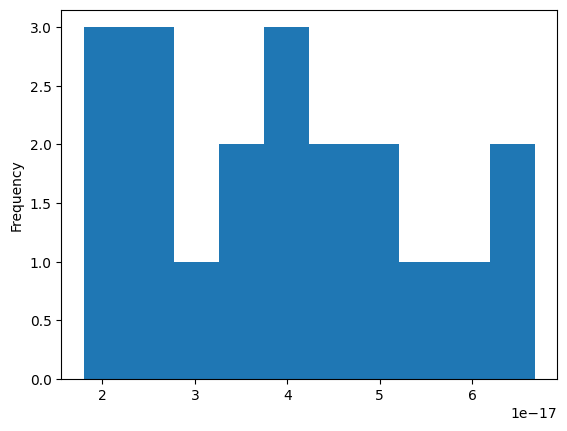

In [31]:
# plot de range de erros por frequencia
ratio_de_erros.plot.hist()

In [32]:
# Meses com mais Predictions errados
ratio_de_erros.sort_values()

Month&Year
2023-09-01    1.799138e-17
2023-04-01    1.966088e-17
2023-03-01    2.223101e-17
2023-01-01    2.328968e-17
2023-08-01    2.362709e-17
2024-05-01    2.472022e-17
2024-04-01    3.148637e-17
2024-06-01    3.296463e-17
2023-07-01    3.524126e-17
2024-08-01    3.765865e-17
2024-02-01    3.766752e-17
2024-01-01    4.107750e-17
2023-11-01    4.533338e-17
2023-12-01    4.534352e-17
2023-05-01    4.861588e-17
2023-10-01    5.010625e-17
2023-06-01    5.230907e-17
2023-02-01    5.724951e-17
2024-03-01    6.242425e-17
2024-07-01    6.675564e-17
dtype: float64

### Salvar em Parquet

In [33]:
# Salvar em Parquet 
df.to_parquet('2020_to_2024-Dollar_to_Real.parquet')

# Vizualizar Parquet
parquet_file = pd.read_parquet('2020_to_2024-Dollar_to_Real.parquet')
print(parquet_file)

          Date Month&Year Day Month  Year     Buy    Sell  Average
0   02/01/2020 2020-01-01  02    01  2020  4.0207  4.0213   4.0210
1   03/01/2020 2020-01-01  03    01  2020  4.0516  4.0522   4.0519
2   06/01/2020 2020-01-01  06    01  2020  4.0548  4.0554   4.0551
3   07/01/2020 2020-01-01  07    01  2020  4.0835  4.0841   4.0838
4   08/01/2020 2020-01-01  08    01  2020  4.0666  4.0672   4.0669
..         ...        ...  ..   ...   ...     ...     ...      ...
35  19/08/2024 2024-08-01  19    08  2024  5.4231  5.4237   5.4234
36  20/08/2024 2024-08-01  20    08  2024  5.4541  5.4547   5.4544
37  21/08/2024 2024-08-01  21    08  2024  5.4701  5.4707   5.4704
38  22/08/2024 2024-08-01  22    08  2024  5.5518  5.5524   5.5521
39  23/08/2024 2024-08-01  23    08  2024  5.5257  5.5263   5.5260

[1170 rows x 8 columns]
